
## Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework
### José Carlos Sánchez Gómez A0174050
### 19 de agosto del 2024


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Separación de los datos en train y test, junto con la declaracion de las tetas y alpha

In [66]:
data = pd.read_csv('/content/drive/MyDrive/ML Data/Valhalla23.csv')
scaler = StandardScaler()
data[['Celsius']] = scaler.fit_transform(data[['Celsius']])

'''
Noté que usando los valores normales de Celsius, SDGRegressor me regresaba la tendencia correcta, pero los valores
eran muy grandes, asi que decidí escalarlos, y se obtuv[].
'''
x_train, x_test, y_train, y_test = train_test_split(data[['Celsius']], data[['Valks']], test_size=0.3)

model = linear_model.SGDRegressor(max_iter = 100, tol = False)
#model = linear_model.LinearRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=100, tol=False)

### Entrenamiento del modelo con 100 iteraciones

In [67]:
puntaje_entrenamiento = model.score(x_train, y_train)
puntaje_prueba = model.score(x_test, y_test)

print('Puntaje de entrenamiento:', puntaje_entrenamiento)
print('Puntaje de prueba:', puntaje_prueba)

predicciones = model.predict(x_test)
error_cuadratico_medio = metrics.mean_squared_error(y_test, predicciones)
print('Error cuadrático medio:', error_cuadratico_medio)

Puntaje de entrenamiento: 0.9946026947428555
Puntaje de prueba: 0.9930817803716375
Error cuadrático medio: 53.868962770375525


### Comparando los resultados de los modelos usando los datos de test, contra los valores originales

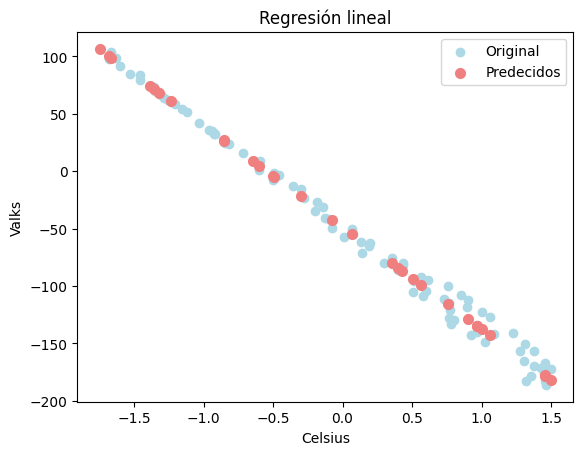

In [68]:
predicciones = model.predict(x_test)
plt.scatter(data['Celsius'], data['Valks'], color = "lightblue")
plt.scatter(x_test, predicciones, color='lightcoral', linewidth=2)
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Regresión lineal')
plt.legend(["Original", "Predecidos"])
plt.show()

In [70]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/Retroalimentacion_Modulo2_Framework.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/Retroalimentacion_Modulo2_Framework.ipynb to html
[NbConvertApp] Writing 631247 bytes to /content/drive/MyDrive/ColabNotebooks/Retroalimentacion_Modulo2_Framework.html
